In [2]:
import sys
sys.path.append("../")

In [3]:

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

import delay.calculator as calc
from delay.delay import *
from delay.strategy import fA_HardSkewTo0, fB_HardSkewTo0, showIntervalFunctions

In [2]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [5]:
def modelFunctions(N, d = 20):    
    def fA(x):
        k = (N - 2*d)/2
        return k if x <= d else -x + k + d

    def fB(x):
        k = (N - 2*d)/2
        return k if x >= -d else x + k + d
    
    return (fA, fB)

def simulate():
    def nextElem(func):
        term = -N/2 if func == max else N/2
        rc = calculateValue(previousA, previousB)
        value = -rc if func == max else rc
        return func(x[current] + value, term)
    
    current = len(x)-1
    for _ in range(0, duration):
        previousA, previousB = fA(x[current - tauA]), fB(x[current - tauB])
        
        prob = calculateProbability(previousA - previousB)
        r = random.random()
        if r < prob:
            nextElement = nextElem(min) # +1
        else:
            nextElement = nextElem(max) # -1
                
        x.append(nextElement)
        current += 1

In [15]:
def getN(d):
    if d:
        return 6*d
    return 100

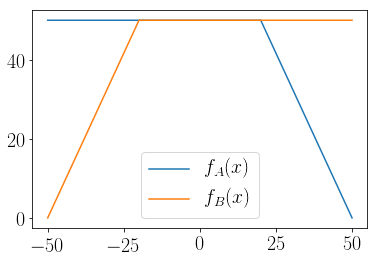

In [5]:
d = 20
N = 100
showIntervalFunctions(fA_HardSkewTo0, fB_HardSkewTo0, N=N, d=d)

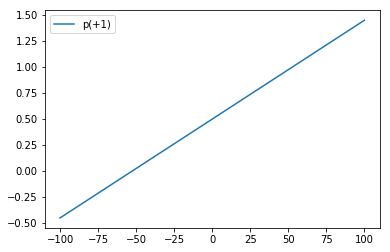

In [14]:
calculateProbability = calc.linear(120)

N = 100
x = np.linspace(-N, N, num=1000)

y = []
for xx in x:
    y.append(calculateProbability(xx))

plt.plot(x, y, label='p(+1)')

plt.legend()
plt.show()

µ =  -0.05805887393757485


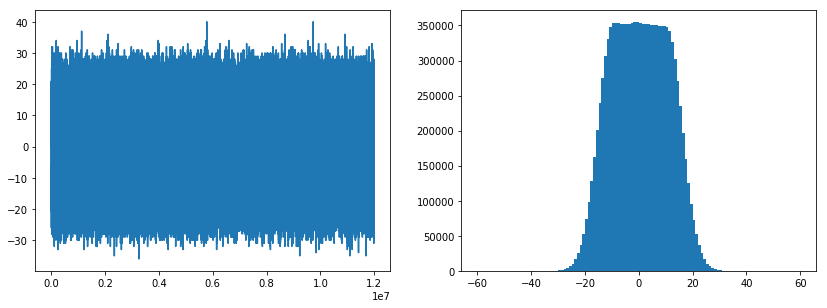

In [22]:
d = 20
N = 6*d
calculateProbability = calc.linear(N)
tauA = 0
tauB = 0
x = [0] * 20 + [1] 
duration = 100000 * N
conv = N

simulate()
            
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4.8))
ax1.plot(x)
(bins, _, _) = ax2.hist(x[100*conv:], bins=np.linspace(-N/2, N/2, N+1))
print('µ = ', np.mean(x[100*conv:]))

µ =  -0.6684999133718568


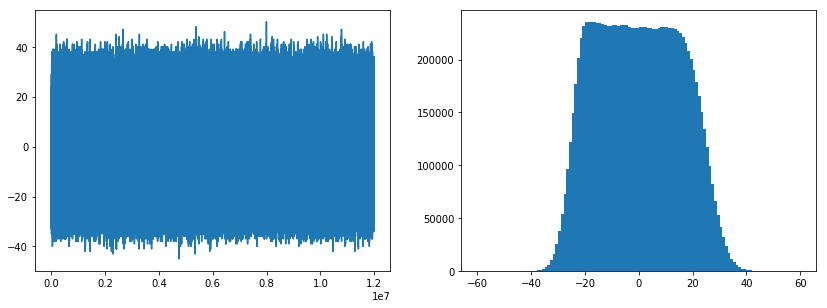

In [16]:
d = 20
N = 6*d
calculateProbability = calc.linear(N)
tauA = 20
tauB = 0
x = [0] * 20 + [1] 
duration = 100000 * N
conv = N

simulate()
            
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4.8))
ax1.plot(x)
(bins, _, _) = ax2.hist(x[100*conv:], bins=np.linspace(-N/2, N/2, N+1));
print('µ = ', np.mean(x[100*conv:]))

µ =  0.45652230672602256


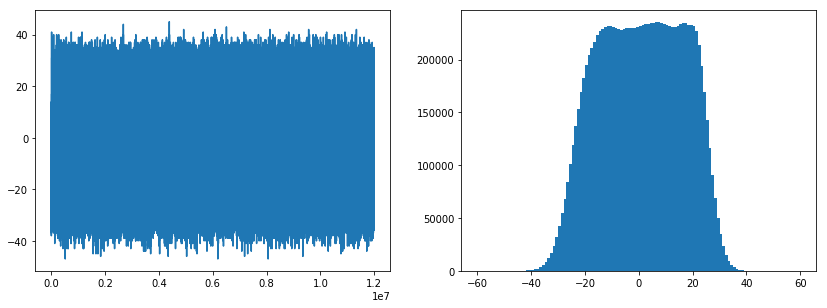

In [17]:
d = 20
N = 6*d
calculateProbability = calc.linear(N)
tauA = 0
tauB = 20
x = [0] * 20 + [1] 
duration = 100000 * N
conv = N

simulate()
            
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4.8))
ax1.plot(x)
(bins, _, _) = ax2.hist(x[100*conv:], bins=np.linspace(-N/2, N/2, N+1))
print('µ = ', np.mean(x[100*conv:]))

d, τ, µ
10 ,  0 ,  -0.35923250029610326
10 ,  10 ,  -1.419214564897379
10 ,  20 ,  -1.0559212196071133
10 ,  30 ,  -1.1168338945195513
10 ,  40 ,  -1.4319723862540397
10 ,  50 ,  -2.201671714522597
10 ,  60 ,  -1.039373276255901
10 ,  70 ,  -2.003164075057952
10 ,  80 ,  -1.4072012317896483
10 ,  90 ,  -2.714827160284936
10 ,  100 ,  -2.5423935297203095


Mean squared error: 0.47
Variance score: 0.00
Line: 0.00x + -1.571982


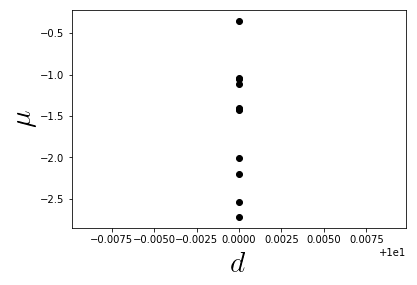

In [9]:
d = 10
N = 6*d
tauA = 0
tauB = 0
x = [0] * 100 + [1] 
duration = 1000 * N
conv = 10
calculateProbability = calc.linear(N)
(fA, fB) = modelFunctions(N, d = d)

ds = []
mus = []

print('d, τ, µ')
for i in range(0, 11):
    x = x[:101]
    tauA = i * 10
    calculateProbability = calc.linear(N, w = 0.99)
    simulate()
    mean = np.mean(x[100*conv:])
    print(d, ', ', tauA, ', ', mean)
    ds.append(d)
    mus.append(mean)
    
print('\n')

ds = np.array(ds).reshape(-1,1)
regr.fit(ds, mus)
mus_pred = regr.predict(ds)
print("Mean squared error: %.2f" % mean_squared_error(mus, mus_pred))
print('Variance score: %.2f' % r2_score(mus, mus_pred))
plt.scatter(ds, mus,  color='black')
plt.plot(ds, mus_pred, color='blue', linewidth=3)
print('Line: ' + '%.2fx + %f' % (regr.coef_, regr.intercept_))
plt.ylabel(r'$\mu$', usetex=True, fontsize=30)
plt.xlabel(r'$d$', usetex=True, fontsize=30);

0 ,  50 ,  0.07720922790772092
2 ,  50 ,  -0.35357646423535766
4 ,  50 ,  -0.8234917650823492
6 ,  50 ,  -0.9028109718902811
8 ,  50 ,  -1.1494385056149439
10 ,  50 ,  -1.3593364066359337
12 ,  50 ,  -1.8966910330896691
14 ,  50 ,  -3.5882941170588296
16 ,  50 ,  -0.4896251037489625
18 ,  50 ,  -2.206847931520685
20 ,  50 ,  -0.5134448655513445
22 ,  50 ,  2.9382006179938203
24 ,  50 ,  -3.973290267097329
26 ,  50 ,  -0.12418875811241888
28 ,  50 ,  1.6061939380606194
30 ,  50 ,  1.1624383756162437
32 ,  50 ,  1.2522374776252236
34 ,  50 ,  -2.0625293747062527
36 ,  50 ,  -2.6820031799682003
38 ,  50 ,  -5.1226187738122615
40 ,  50 ,  -0.6877831221687783
42 ,  50 ,  -10.862221377786222
44 ,  50 ,  9.643253567464326
46 ,  50 ,  0.9015009849901501
47 ,  50 ,  -4.082149178508215
48 ,  50 ,  -2.4567054329456703
49 ,  50 ,  -25.32921670783292
50 ,  50 ,  -10.75690243097569
52 ,  50 ,  3.6982730172698273
54 ,  50 ,  -14.668323316766832
56 ,  50 ,  7.157858421415786
58 ,  50 ,  6.371486285137

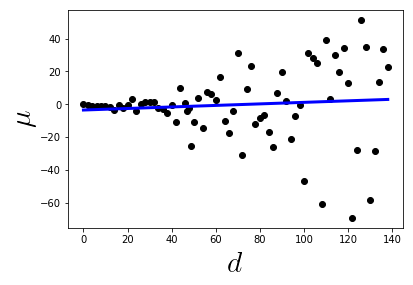

In [23]:
N = 100
tauA = 0
tauB = 0
x = [0] * 100 + [1] 
duration = 1000 * N
conv = 100

ds = []
mus = []

tauA = 50
testIntervals = np.array(list(range(0, 70)))
testIntervals *= 2
testIntervals = np.sort(np.append(testIntervals, [47,49]))
for d in testIntervals:
    x = x[:101]
    N = getN(d)
    calculateProbability = calc.linear(N, w = 0.99)
    (fA, fB) = modelFunctions(N, d = d)
    simulate()
    mean = np.mean(x[1*conv:])
    print(d, ', ', tauA, ', ', mean)
    ds.append(d)
    mus.append(mean)
    
print('\n')

ds = np.array(ds).reshape(-1,1)
regr.fit(ds, mus)
mus_pred = regr.predict(ds)
print("Mean squared error: %.2f" % mean_squared_error(mus, mus_pred))
print('Variance score: %.2f' % r2_score(mus, mus_pred))
plt.scatter(ds, mus,  color='black')
plt.plot(ds, mus_pred, color='blue', linewidth=3)
print('Line: ' + '%.2fx + %f' % (regr.coef_, regr.intercept_))
plt.ylabel(r'$\mu$', usetex=True, fontsize=30)
plt.xlabel(r'$d$', usetex=True, fontsize=30);
    

d, τ, µ
30 ,  0 ,  4.314946559971587
30 ,  10 ,  -5.03742466787272
30 ,  20 ,  -2.237655519916538
30 ,  30 ,  0.44820812199642623
30 ,  40 ,  -3.237666618572491
30 ,  50 ,  4.335268199021098
30 ,  60 ,  1.3466443213726818
30 ,  70 ,  -3.4049122651246932
30 ,  80 ,  -2.6267078056847315
30 ,  90 ,  -4.919601336278177
30 ,  100 ,  -5.461226845429018
0 ,  150 ,  -0.12200752488873598
2 ,  150 ,  -0.3719714542568895
4 ,  150 ,  -0.3988745962863897
6 ,  150 ,  -1.1992430716640214
8 ,  150 ,  -1.3296300817970943
10 ,  150 ,  -1.4100176468629648
12 ,  150 ,  -2.26673399851278
14 ,  150 ,  -4.395533900844608
16 ,  150 ,  -3.4341350262483212
18 ,  150 ,  -3.641413524822144
20 ,  150 ,  -4.088667162406632


Mean squared error: 9.35
Variance score: 0.20
Line: -0.24x + 0.897200


Mean squared error: 0.27
Variance score: 0.88
Line: -0.22x + 0.183185


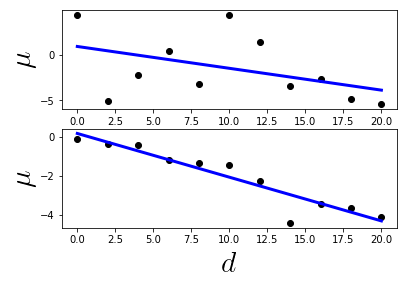

<Figure size 432x288 with 0 Axes>

In [28]:
N = 100
tauA = 0
tauB = 0
x = [0] * 100 + [1] 
duration = 1000 * N
conv = N
d = 30
(fA, fB) = modelFunctions(N, d = d)

ds = []
taus = []
musOfTau = []
musOfD = []

print('d, τ, µ')
for i in range(0, 11):
    x = x[:101]
    tauA = i * 10
    calculateProbability = calc.linear(N, w = 0.99)
    simulate()
    mean = np.mean(x[100*conv:])
    print(d, ', ', tauA, ', ', mean)
    taus.append(tauA)
    musOfTau.append(mean)

tauA = 150
for i in range(0, 11):
    x = x[:101]
    d = i * 2
    (fA, fB) = modelFunctions(N, d = d)
    calculateProbability = calc.linear(N, w = 0.99)
    simulate()
    mean = np.mean(x[100*conv:])
    print(d, ', ', tauA, ', ', mean)
    ds.append(d)
    musOfD.append(mean)
    
_, (ax1, ax2) = plt.subplots(nrows = 2, ncols=1) #figsize=(14,14)
fig = plt.figure()
print('\n')

taus = np.array(ds).reshape(-1,1)
regr.fit(taus, musOfTau)
mus_pred = regr.predict(taus)
print("Mean squared error: %.2f" % mean_squared_error(musOfTau, mus_pred))
print('Variance score: %.2f' % r2_score(musOfTau, mus_pred))
ax1.scatter(taus, musOfTau,  color='black')
ax1.plot(taus, mus_pred, color='blue', linewidth=3)
print('Line: ' + '%.2fx + %f' % (regr.coef_, regr.intercept_))
ax1.set_ylabel(r'$\mu$', usetex=True, fontsize=30)
ax1.set_xlabel(r'$\tau$', usetex=True, fontsize=30);

# -----------------------------------------------------------------

print('\n')

ds = np.array(ds).reshape(-1,1)
regr.fit(ds, musOfD)
mus_pred = regr.predict(ds)
print("Mean squared error: %.2f" % mean_squared_error(musOfD, mus_pred))
print('Variance score: %.2f' % r2_score(musOfD, mus_pred))
ax2.scatter(ds, musOfD,  color='black')
ax2.plot(ds, mus_pred, color='blue', linewidth=3)
print('Line: ' + '%.2fx + %f' % (regr.coef_, regr.intercept_))
ax2.set_ylabel(r'$\mu$', usetex=True, fontsize=30)
ax2.set_xlabel(r'$d$', usetex=True, fontsize=30);